<h1 style="font-family: Arial; font-size:1.75em;color:red; font-style:bold">Made by Itaachime </h1>
<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">Loading the libraries we need: numpy, scipy, matplotlib</p>


In [106]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Creating a numpy array from an image file:</p> 

<br>
choose a image file as an ndarray and display its type.
to put your image just change the image name in this line:-
photo_data =misc.imread('Your_pic_name')


In [107]:
from skimage import data

photo_data = misc.imread('flower.jpg')

type(photo_data)


C:\Users\Itaachime\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


numpy.ndarray

Take a look at this image.

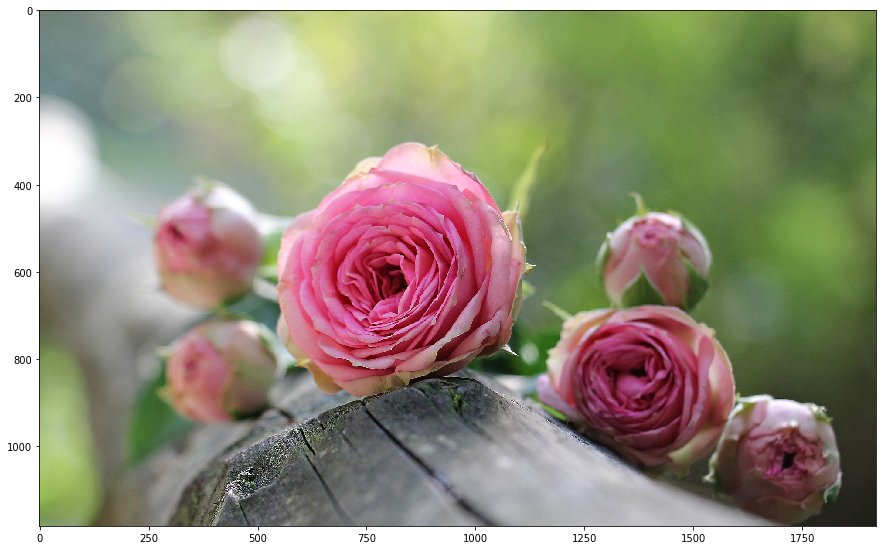

In [108]:
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

In [109]:
photo_data.shape

#print(photo_data)

(1183, 1920, 3)

The shape of the ndarray show that it is a three layered matrix. The first two numbers here are length and width, and the third number (i.e. 3) is for three layers: Red, Green and Blue.




In [110]:
photo_data.size

6814080

In [111]:
photo_data.min(), photo_data.max()

(0, 255)

In [112]:
photo_data.mean()

126.7010347691838

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

to see the rgb value of Pixel on the 150th Row and 250th Column</p>

In [113]:
photo_data[150, 250]

array([153, 173, 136], dtype=uint8)

In [114]:
photo_data[150, 250, 1]

173

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Changing colors in a Range<p/>
<br/>
We can also use a range to change the pixel values. As an example, let's set the green layer for rows 200 to 500 to full intensity. just by changing the value of the 

C:\Users\Itaachime\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


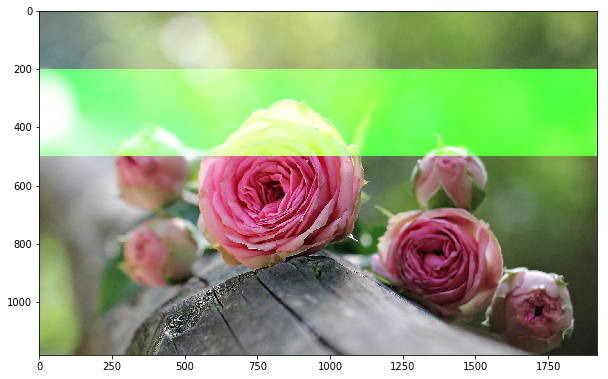

In [115]:
photo_data = misc.imread('flower.jpg')

photo_data[200:500, : ,1] = 255
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Pick all Pixels with Low Values</p>

In [116]:
photo_data = misc.imread('flower.jpg')
print("Shape of photo_data:", photo_data.shape)
low_value_filter = photo_data < 200
print("Shape of low_value_filter:", low_value_filter.shape)

C:\Users\Itaachime\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


Shape of photo_data: (1183, 1920, 3)
Shape of low_value_filter: (1183, 1920, 3)


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Filtering Out Low Values</p><br/>
Whenever the low_value_filter is True, set value to 0.

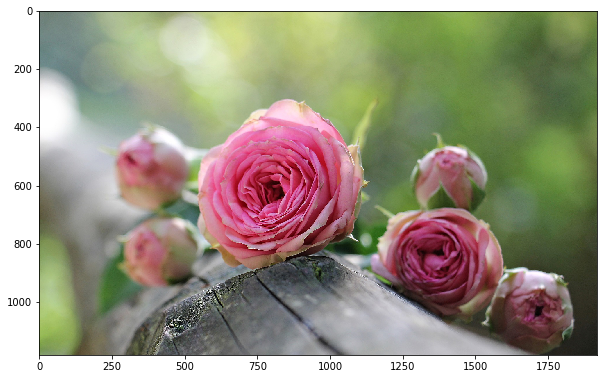

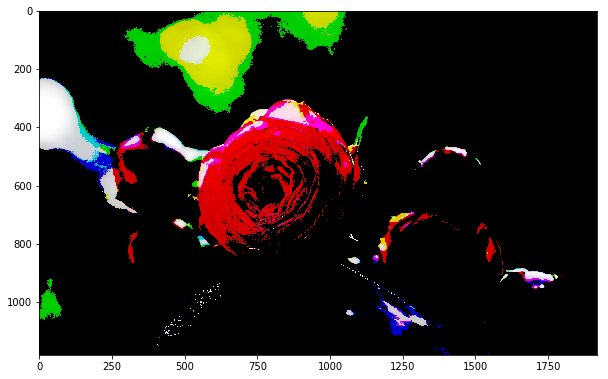

In [117]:
#import random
plt.figure(figsize=(10,10))
plt.imshow(photo_data)
photo_data[low_value_filter] = 0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
More Row and Column Operations</p><br>
You can design complex patters by making cols a function of rows or vice-versa. Here we try a linear relationship between rows and columns.

In [118]:
rows_range = np.arange(len(photo_data))
cols_range = rows_range
print(type(rows_range))

<class 'numpy.ndarray'>


In [119]:
photo_data[rows_range, cols_range] = 250

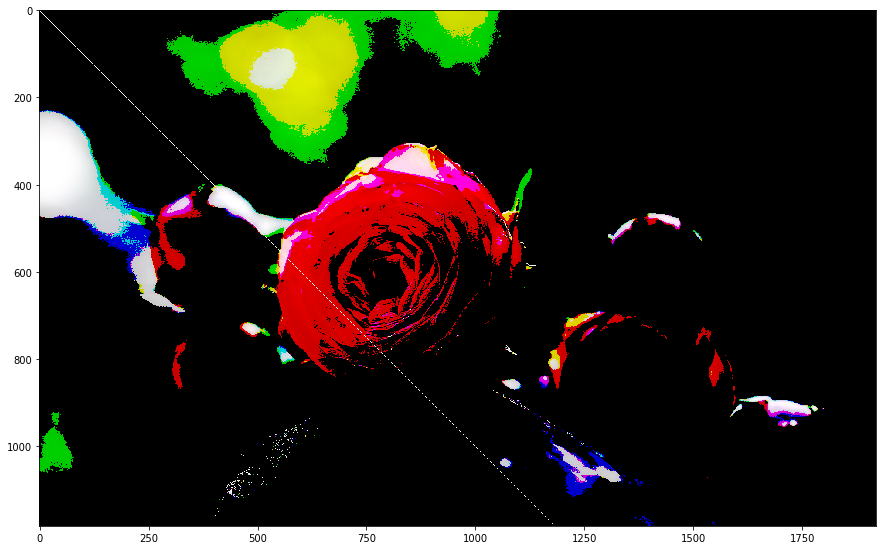

In [120]:
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Masking Images</p>
<br>Masking image in circular shape.

In [121]:
total_rows, total_cols, total_layers = photo_data.shape
#print("photo_data = ", photo_data.shape)

X, Y = np.ogrid[:total_rows, :total_cols]
#print("X = ", X.shape, " and Y = ", Y.shape)

In [122]:
center_row, center_col = total_rows / 2, total_cols / 2
#print("center_row = ", center_row, "AND center_col = ", center_col)
#print(X - center_row)
#print(Y - center_col)
dist_from_center = (X - center_row)**2 + (Y - center_col)**2
#print(dist_from_center)
radius = (total_rows / 2)**2
#print("Radius = ", radius)
circular_mask = (dist_from_center > radius)
#print(circular_mask)
print(circular_mask[1500:1700,2000:2200])

[]


C:\Users\Itaachime\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


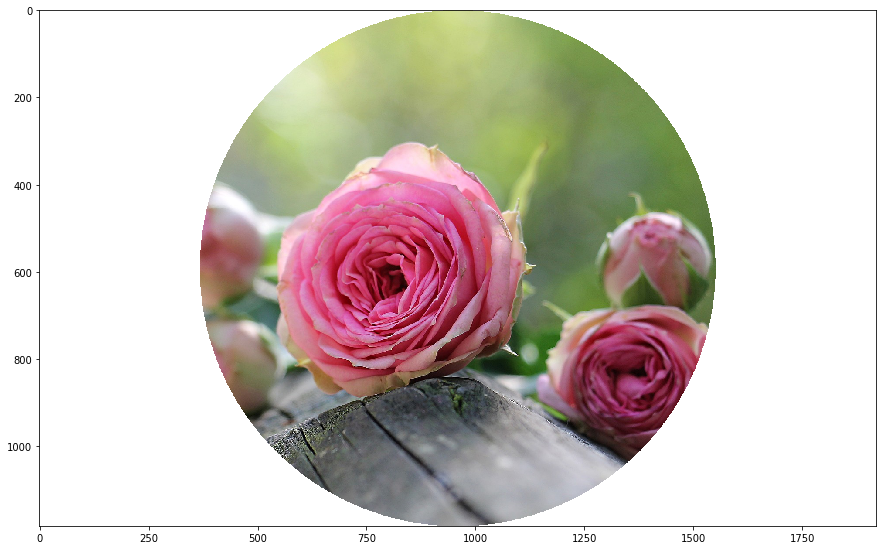

In [123]:
photo_data = misc.imread('flower.jpg')
photo_data[circular_mask] = 255
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Further Masking</p>
<br/>To get upper half disc. put < sign <br>
To get lower half disc put > sign

In [124]:
X, Y = np.ogrid[:total_rows, :total_cols]
half_upper = X < center_row # this line generates a mask for all rows above the center

half_upper_mask = np.logical_and(half_upper, circular_mask)

C:\Users\Itaachime\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


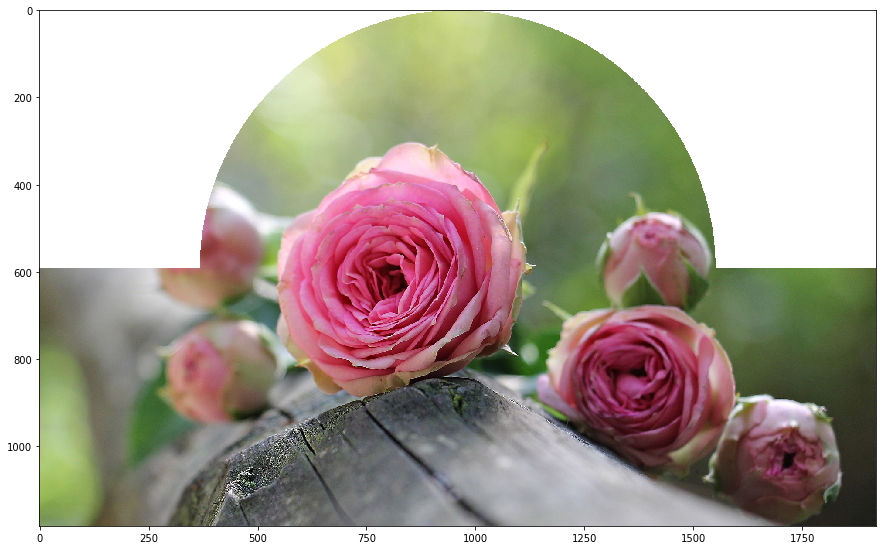

In [125]:
photo_data = misc.imread('flower.jpg')
photo_data[half_upper_mask] = 255
#photo_data[half_upper_mask] = random.randint(200,255)
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>
Further Processing of our Image </p>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Processing of Pixels</p>
<p> By changing the value as 0,1,2 in line(0=red,1=green,2=blue)<br>
    mask   = photo_data[:, : ,0] < 150 <br>
                                          to see the diffrent masking acc o choosed color</p>



C:\Users\Itaachime\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


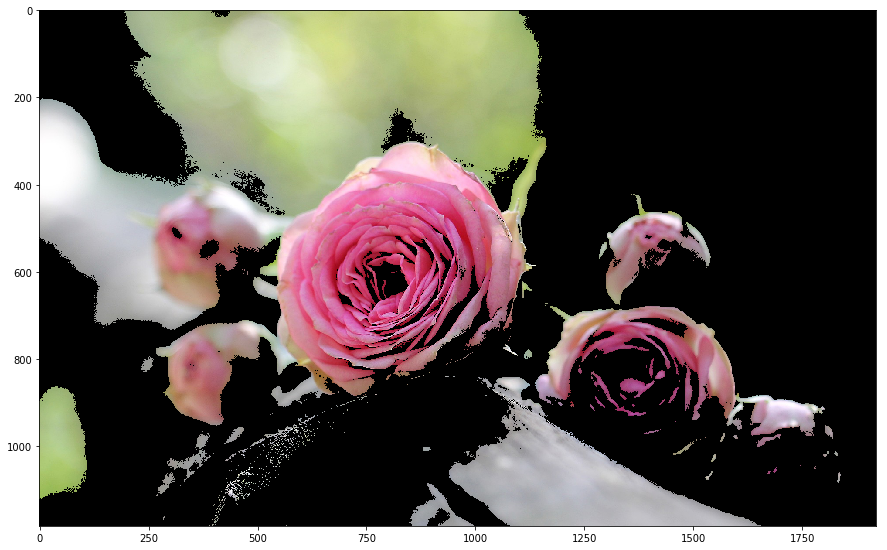

In [126]:
photo_data = misc.imread('flower.jpg')
mask   = photo_data[:, : ,0] < 150

photo_data[mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Composite mask that takes thresholds on all three layers: RED, GREEN, BLUE</p>

C:\Users\Itaachime\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


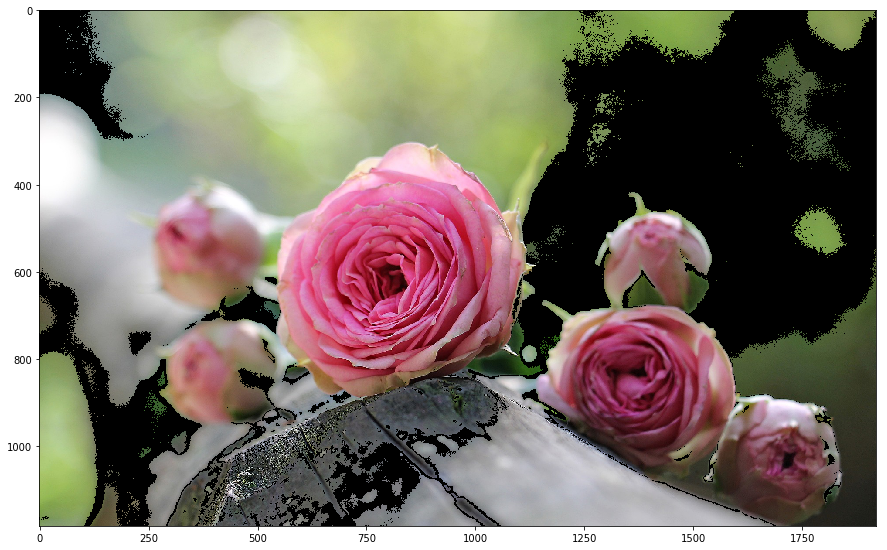

In [130]:
photo_data = misc.imread('flower.jpg')

red_mask   = photo_data[:, : ,0] < 120
green_mask = photo_data[:, : ,1] > 100
blue_mask  = photo_data[:, : ,2] > 200

final_mask = np.logical_and(red_mask, green_mask, blue_mask)
photo_data[final_mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)